# WEEK 2 Ungraded Solutions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>

METRICS:<br>
Mean Squared Error : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
Mean Absolute Error : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Accuracy Score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html<br>

####  IMPORTING THE DATA

In [ ]:
# WRITE CODE HERE IMPORT THE DATA AS 'data'
# Start code
data = pd.read_csv("cars_data.csv")
# End code

In [ ]:
# VIEWING THE DATA ONCE
# Start code
data.head()
# End code

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


We will use the `train_test_split` function to split the data into TRAIN and TEST <br>
Here we import it from SKLEARN

In [ ]:
from sklearn.model_selection import train_test_split

If you don't know about Feature transformation, it is highly recommended to go through this blog before proceding<br>
<a href="https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45">Top 3 Methods for Handling Skewed data</a>
#### TLDR; We wish that all our features have a normal distribution

Let us look at the Distribution of `Price` column 

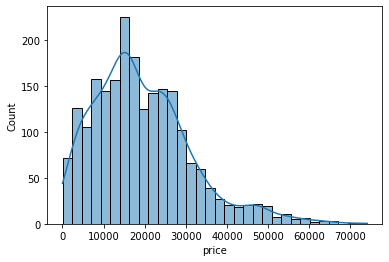

In [ ]:
sns.histplot(x=data['price'], kde=True);

It is LEFT-SKEWED <br>
We will either use log transform or sqrt transform

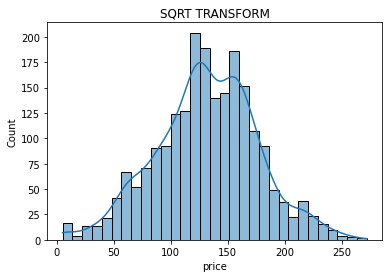

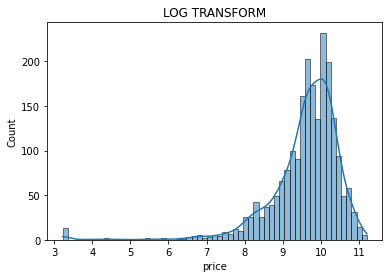

In [ ]:
# WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
sns.histplot(x=np.sqrt(data['price']), kde=True);
plt.title('SQRT TRANSFORM');
plt.show()
sns.histplot(np.log(data['price']), kde=True);
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [ ]:
# WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']), 2)

In [ ]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis = 1), data['price'], 
                                                    test_size = 0.2, random_state = 1)

In [ ]:
# LET US PRINT THE SHAPES
print(X_train.shape) # Shape of X_train
print(X_test.shape) # Shape of X_test
print(y_train.shape) # Shape of y_train
print(y_test.shape) # Shape of y_test

print('\nExpected shapes')
print((1722, 19))
print((431, 19))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 19)
(431, 19)
(1722,)
(431,)

Expected shapes
(1722, 19)
(431, 19)
(1722,)
(431,)

Verify if they are matching


<!-- NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br> -->
### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS as Linreg
# Start code
Linreg = LinearRegression()
# End code


# FIT the model on the training data i.e. (X_train, y_train)
# Start Code
Linreg.fit(X_train, y_train)
# End Code


# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train), np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test), np.square(Linreg.predict(X_test)))))


# WRITE CODE FOR MEAN ABSOLUTE ERROR
# Start code
print("Linear Regression Training mean_square_error is " + str(mean_absolute_error(np.square(y_train), np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_absolute_error(np.square(y_test), np.square(Linreg.predict(X_test)))))
# End code


print("\n")
print("The correct values are :")

print('Linear Regression Training mean_square_error is 90997459.24037895')
print('Linear Regression Testing mean_square_error is 93998879.06677727')
print('Linear Regression Training mean_absolute_error is 6864.98050501778')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training mean_square_error is 90997459.24037895
Linear Regression Testing mean_square_error is 93998879.06677727
Linear Regression Training mean_square_error is 6864.98050501778
Linear Regression Testing mean_square_error is 6926.987292556893


The correct values are :
Linear Regression Training mean_square_error is 90997459.24037895
Linear Regression Testing mean_square_error is 93998879.06677727
Linear Regression Training mean_absolute_error is 6864.98050501778
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<!-- ##### NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES -->
##### Now for CLASSIFICATION models, we need to convert the target variable into different classes

In [ ]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

<!-- WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000 -->
##### We will do Binary Classification (i.e. Classify into 2 classes) and divide the data equally (ALMOST) into 1's and 0's <br>
##### We have chosen threshold at PRICE = 20000

In [ ]:
data.loc[np.square(data['price']) < 20000, 'price'] = 0
data.loc[np.square(data['price']) >= 20000, 'price'] = 1

In [ ]:
# VIEWING THE DATA ONCE
# Start code
data.head()
# End code

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,0.0,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1.0,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1.0,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis = 1), data['price'], 
                                                    test_size = 0.2,random_state = 1)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Write Code here and find the Accuracy for LOGISTIC REGRESSION

In [ ]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, random_state as 1 
# START CODE
LogReg = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=1)
# END CODE

 
# FIT Logistic Regression ON TRAINING DATA
# START CODE
LogReg.fit(X_train, y_train)
# END CODE


# Find the Training and Testing Error using the accuracy_score function imported above
# START CODE
print("Logistic Regression Training Accuracy " + str(accuracy_score(y_train, LogReg.predict(X_train))))
print("Logistic Regression Testing Accuracy " + str(accuracy_score(y_test, LogReg.predict(X_test))))
# END CODE


print("\n")
print("The correct values are :")

print("Logistic Regression Training Accuracy 0.7264808362369338")
print("Logistic Regression Testing Accuracy 0.7192575406032483")

print("\nPlease verify if you have got the same values")

Logistic Regression Training Accuracy 0.7264808362369338
Logistic Regression Testing Accuracy 0.7192575406032483


The correct values are :
Logistic Regression Training Accuracy 0.7264808362369338
Logistic Regression Testing Accuracy 0.7192575406032483

Please verify if you have got the same values
